In [4]:
from textblob import TextBlob
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from credentials import *
import tweepy
import re
from pprint import pprint

In [5]:
dummy = 'he is more fake'
blob = TextBlob(dummy)
print(blob.tags)
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

[('he', 'PRP'), ('is', 'VBZ'), ('more', 'RBR'), ('fake', 'JJ')]
0.0


In [6]:
def drawGraph(matrix,labels):
    labels = {value : key for key,value in labels.items()}
    value = np.array(matrix)
    G = nx.DiGraph(value)
    pos=nx.draw_networkx_labels(G,nx.shell_layout(G),labels,font_size=16)
    nx.draw(G,nx.shell_layout(G),node_size=1500)
    plt.show()

In [15]:
#print(ACCESS_SECRET)
def twitterSetup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,  'cPOc0ksOYevSh5wfeStWa3OHXXjMSoEFoIvXgUI27Q1F7')
    api = tweepy.API(auth)
    return api

tweetsFile = open('tweets.txt','a')
extractor = twitterSetup()
tweets = []
for p in range(1,5):
    partTweets = extractor.user_timeline(screen_name="realDonaldTrump", count=500,page=p)
    for line in partTweets:
        tweetStr+=line.text+"\n"
        tweets.append(line.text)
    print("Number of tweets extracted: {}.\n".format(len(tweets)))

Number of tweets extracted: 200.

Number of tweets extracted: 400.

Number of tweets extracted: 600.

Number of tweets extracted: 797.



In [16]:
allTweets = [re.sub('\W+',' ', tweet) for tweet in [' '.join(rawTweet.split(' ')[:-1]) for rawTweet in tweets]]
print("5 recent tweets:\n")
for tweet in allTweets[0:5]:
    print(tweet)

5 recent tweets:

Why does the Mueller team have 13 hardened Democrats some big Crooked Hillary supporters and Zero Republicans An 
Spent very little time with Andrew McCabe but he never took notes when he was with me I don t believe he made mem 
Wow watch Comey lie under oath to Senator G when asked have you ever been an anonymous source or known someone 
The Mueller probe should never have been started in that there was no collusion and there was no crime It was base 
The Fake News is beside themselves that McCabe was caught called out and fired How many hundreds of thousands of 


In [17]:
sentences = ["I ate a delicious hamburger.",
            "Zack joins the Sprockets Academy Explorers Club at school",
            "Zack gets paired up with Seth, the class bully, and that's dreadful but Zack is excited when he finds a huge galaxy gemmite",
            "A gemmite that large was found in last 100 years",
            "My favorite part is that the bird tried and learned that she could fly",
            "The bird has to decide if it will try to fly",
            "it was not sure if it wants to",
            "One fateful day they make the acquaintance of the Cotton family"]
matrix = [[0 for i in range(37)] for j in range(37)]
indexMap = {'CC':0,'CD':1,'DT':2,'EX':3,'FW':4,'IN':5,'JJ':6,'JJR':7,'JJS':8,'LS':9,'MD':10,'NN':11,'NNP':13,'NNPS':14,'NNS':12,'PDT':15,
            'POS':16,'PRP':17,'PRP$':18,'RB':19,'RBR':20,'RBS':21,'RP':22,'SYM':23,'TO':24,'UH':25,'VB':26,'VBD':27,'VBG':28,'VBN':29,'VBP':30,'VBZ':31,'WDT':32,'WP':33,'WP$':34,'WRB':35,'end':36}
posToNeg = {}
negToPos = {}
toConsider = ['JJ','JJR','JJS', 'RB','RBR','RBS','VB','VBD','VBG','VBN','VBP','VBZ']
allTweets.extend(sentences)
combWords = []
for text in allTweets:
    blob = TextBlob(text)
    tags = blob.tags
    for i in range(1,len(tags)):
        x = indexMap[tags[i-1][1]]
        y = indexMap[tags[i][1]]
        matrix[x][y] +=1
    matrix[indexMap[tags[-1][1]]][-1] = 1
    polarity = 0
    if blob.sentences[0].sentiment.polarity>0.0:
        polarity = 1
    elif blob.sentences[0].sentiment.polarity<0.0:
        polarity =-1
    cWords = []
    for i in range(len(tags)):
        if(tags[i][1] not in toConsider):
            continue
        split = text.split(" ")
        join = split[:i]
        join.extend(split[i+1:])
        sc = ' '.join(join)
        b = TextBlob(sc)
        if(len(b.sentences)<1):
            continue 
        rawPol = b.sentences[0].sentiment.polarity
        tempPolarity = 0
        if rawPol>0.0:
            tempPolarity = 1
        elif rawPol<0.0:
            tempPolarity =-1
        if(polarity>tempPolarity):
            x = (tags[i][0].lower(),tags[i][1])
            negToPos[x] = 1
            cWords.append(x)
        elif(polarity<tempPolarity):
            x = (tags[i][0].lower(),tags[i][1])
            posToNeg[x] = 1
            cWords.append(x)
    combWords.append(cWords)

In [18]:
pprint(posToNeg)
print()
pprint(negToPos)

{("'s", 'VBZ'): 1,
 ('approximately', 'RB'): 1,
 ('bad', 'JJ'): 1,
 ('big', 'JJ'): 1,
 ('boring', 'JJ'): 1,
 ('come', 'VB'): 1,
 ('corrupt', 'JJ'): 1,
 ('cutting', 'VBG'): 1,
 ('desperate', 'JJ'): 1,
 ('desperately', 'RB'): 1,
 ('destroy', 'VB'): 1,
 ('difficult', 'JJ'): 1,
 ('disappointed', 'VBD'): 1,
 ('dishonest', 'JJS'): 1,
 ('down', 'RB'): 1,
 ('everyday', 'JJ'): 1,
 ('expected', 'VBN'): 1,
 ('failed', 'JJ'): 1,
 ('fake', 'JJ'): 1,
 ('foreign', 'JJ'): 1,
 ('guilty', 'JJ'): 1,
 ('half', 'JJ'): 1,
 ('hard', 'JJ'): 1,
 ('hard', 'RB'): 1,
 ('hated', 'JJ'): 1,
 ('heavy', 'JJ'): 1,
 ('horrible', 'JJ'): 1,
 ('illegal', 'JJ'): 1,
 ('insecure', 'JJ'): 1,
 ('little', 'JJ'): 1,
 ('long', 'JJ'): 1,
 ('long', 'RB'): 1,
 ('not', 'RB'): 1,
 ('other', 'JJ'): 1,
 ('outdated', 'VBN'): 1,
 ('political', 'JJ'): 1,
 ('previous', 'JJ'): 1,
 ('repellent', 'JJ'): 1,
 ('roughly', 'RB'): 1,
 ('sad', 'JJ'): 1,
 ('sadly', 'RB'): 1,
 ('secret', 'JJ'): 1,
 ('simple', 'JJ'): 1,
 ('sloppy', 'JJ'): 1,
 ('small', 

In [25]:
pprint([combWord for combWord in combWords if len(combWord)>0])

[[('little', 'JJ')],
 [('many', 'JJ')],
 [('happy', 'JJ')],
 [('brave', 'VBP')],
 [('welcome', 'VB')],
 [('incredible', 'JJ')],
 [('wonderful', 'JJ')],
 [('major', 'JJ')],
 [('incredible', 'JJ')],
 [('better', 'JJR')],
 [('illegal', 'JJ')],
 [('free', 'JJ')],
 [('higher', 'JJR')],
 [('wonderful', 'JJ')],
 [('first', 'JJ')],
 [('incredible', 'JJ')],
 [('right', 'JJ')],
 [('expected', 'VBN')],
 [('great', 'JJ')],
 [('more', 'JJR')],
 [('many', 'JJ')],
 [('top', 'JJ')],
 [('bad', 'JJ')],
 [('wants', 'VBZ')],
 [('stupid', 'JJ')],
 [('happy', 'JJ')],
 [('bad', 'JJ')],
 [('many', 'JJ')],
 [('bad', 'JJ')],
 [('small', 'JJ')],
 [('great', 'JJ')],
 [('great', 'JJ')],
 [('beautiful', 'JJ')],
 [('legal', 'JJ')],
 [('be', 'VB'), ('happy', 'JJ')],
 [('strongly', 'RB')],
 [('true', 'JJ')],
 [('great', 'JJ')],
 [('welcome', 'VB')],
 [('incredible', 'JJ')],
 [('interested', 'JJ')],
 [('great', 'JJ')],
 [('winning', 'VBG')],
 [('many', 'JJ')],
 [('strongly', 'RB')],
 [('right', 'VBD')],
 [('true', 'JJ'

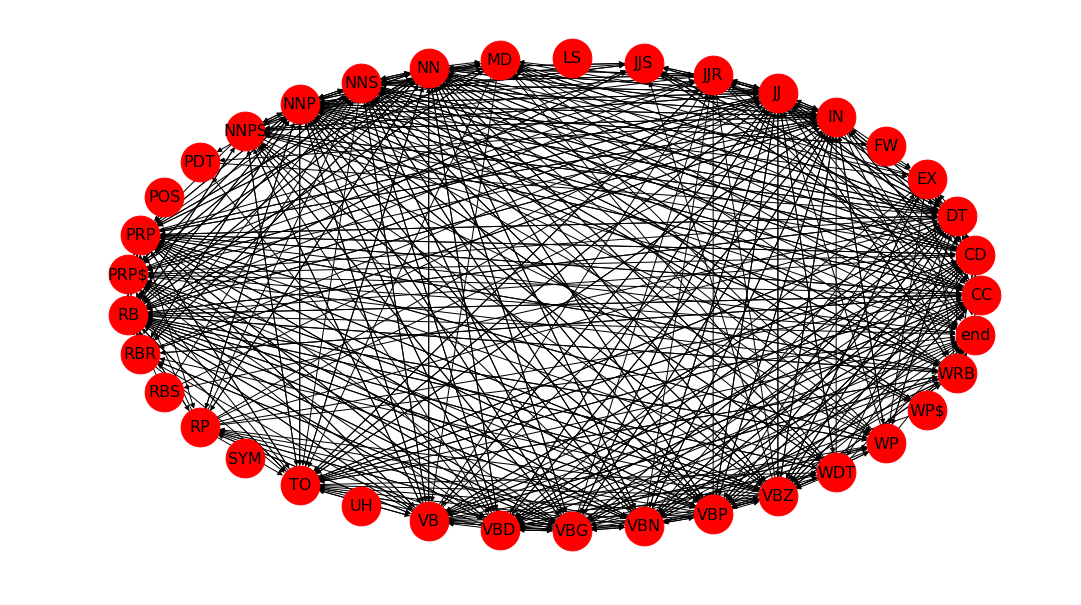

In [21]:
drawGraph(matrix,indexMap)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [23]:
def getPolarity(sc):
    blob = TextBlob(sc)
    initPol = 0.0
    for t in blob.tags:
        tag = (t[0].lower(),t[1]) 
        if(tag[1] not in toConsider):
            continue
        if(initPol==0.0):
            if(tag in negToPos and negToPos[tag]==1):
                initPol = 1
                #print(tag)
            elif((tag in posToNeg) and posToNeg[tag]==1):
                initPol = -1
                #print(tag)
        elif((tag in posToNeg) and posToNeg[tag]==1):
            initPol = -1 * initPol
            #print(tag)
        elif(tag in negToPos and negToPos[tag]==1):
            initPol  = 1 * initPol
            #print(tag)
    return(initPol)

In [24]:
sentences = ["I ate a delicious hamburger.",
            "Zack joins the Sprockets Academy Explorers Club at school",
            "Zack gets paired up with Seth, the class bully, and that's dreadful but Zack is excited when he finds a huge galaxy gemmite",
            "A gemmite that large was found in last 100 years",
            "My favorite part is that the bird tried and learned that she could fly",
            "The bird has to decide if it will try to fly",
            "it was not sure if it wants to",
            "One fateful day they make the acquaintance of the Cotton family"]

print("Index        Predicted        Target")
i=1
accuracy = 0
for sc in sentences:
    predicted = getPolarity(sc)
    dummy = sc
    blob = TextBlob(dummy)
    for sentence in blob.sentences:
        target = sentence.sentiment.polarity
    print(str(i)+"              "+str(predicted)+"               "+str(target))
    if(predicted>0 and target>0 or predicted <0 and target<0 or predicted==0.0 and target==0):
        accuracy+=1
    i+=1
print("Accuracy : "+str(accuracy/len(sentences)))

Index        Predicted        Target
1              1               1.0
2              0.0               0.0
3              -1               -0.07499999999999997
4              1               0.10714285714285714
5              1               0.65
6              1               0.8
7              1               -0.024999999999999994
8              0.0               0.0
Accuracy : 0.875
